In [22]:
import pandas as pd
file = r"C:\Users\kuzik\Downloads\2017_jun_final.csv"
poll = pd.read_csv(file)

In [23]:
poll.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [24]:
poll.shape

(8704, 25)

In [25]:
poll.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [26]:
poll.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

In [27]:
poll=poll.drop(columns=['Специализация', 'Университет', 'Предметная.область', 'Валюта', 'cls'])

In [28]:
poll.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [29]:
poll.dropna()
poll.shape

(8704, 20)

In [30]:
python_data = pd.read_csv(file)

In [31]:
python_data = python_data.dropna(subset=['Язык.программирования'])

In [32]:
python_data = python_data[python_data["Язык.программирования"] == 'Python']

In [33]:
python_data.shape

(207, 25)

In [34]:
python_data_grp = python_data.groupby(by=['Должность'])
python_data_grp.agg({'Зарплата.в.месяц' : ['max', 'min']})

Зарплата.в.месяц      
                                      max   min
Должность                                      
Junior Software Engineer             1250   100
Senior Software Engineer             9200  1300
Software Engineer                    5400   500
System Architect                     5000  3000
Technical Lead                       6200  1425

In [35]:
def fill_avg_salary():
    avg_selary = python_data_grp.agg({'Зарплата.в.месяц' : ['mean']})
    return avg_selary

In [36]:
avg_salary = fill_avg_salary()

In [37]:
avg_salary

,Зарплата.в.месяц
,mean
Должность,
Junior Software Engineer,560.841270
Senior Software Engineer,3387.096774
Software Engineer,1799.070000
System Architect,4000.000000
Technical Lead,3165.909091


In [38]:
import numpy as np
python_data.insert(7, "avg", np.nan)

In [39]:
python_data.apply(avg_salary ,axis=1, raw=False)
python_data['avg'] = python_data.groupby(['Должность'])['Зарплата.в.месяц'].transform('mean')

SpecificationError: nested renamer is not supported

In [40]:
python_data

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,avg,Изменение.зарплаты.за.12.месяцев,Город,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
12,13,Software Engineer,Python,NaN,1,меньше 3 месяцев,800,NaN,200,Киев,...,False,ниже среднего,"Веб-разработка,Другое",12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,NaN,DEV
68,69,Software Engineer,Python,NaN,1.5,0.5,900,NaN,900,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,NaN,DEV
87,88,Junior Software Engineer,Python,NaN,0.5,0.5,600,NaN,0,Киев,...,True,выше среднего,"Веб-разработка,eCommerce",12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,NaN,DEV
114,115,Junior Software Engineer,Python,NaN,1.5,0.5,685,NaN,250,Киев,...,False,средний,Другое,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,NaN,DEV
143,144,Junior Software Engineer,Python,NaN,1,1,750,NaN,250,Киев,...,True,выше среднего,Веб-разработка,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,NaN,5,1,2000,NaN,800,Запорожье,...,False,средний,Веб-разработка,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000,NaN,DEV
8625,8626,Software Engineer,Python,NaN,4,1,1750,NaN,0,Киев,...,False,средний,Веб-разработка,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750,NaN,DEV
8635,8636,Senior Software Engineer,Python,NaN,10 и более лет,меньше 3 месяцев,4000,NaN,1300,Удаленно,...,False,выше среднего,Веб-разработка,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000,NaN,DEV
8673,8674,Junior Software Engineer,Python,NaN,0.5,0.5,350,NaN,50,Киев,...,False,средний,Веб-разработка,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350,NaN,DEV


In [41]:
python_data['avg'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: avg, dtype: float64

In [42]:
python_data.to_csv("data.csv", index=False)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

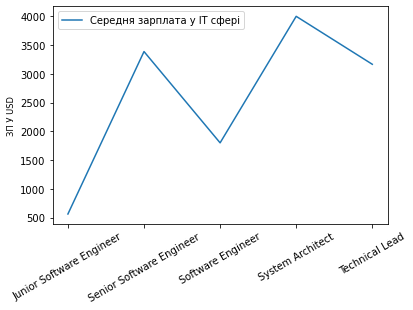

In [59]:
plt.plot(avg_salary['Зарплата.в.месяц'], label='Середня зарплата у ІТ сфері')
plt.xticks(rotation=30)
plt.ylabel('ЗП У USD', size='small', color='black')
plt.legend()
plt.show()


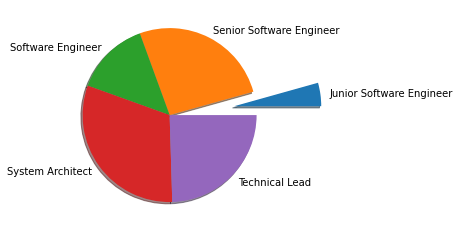

In [73]:
plt.pie(avg_salary['Зарплата.в.месяц']['mean'], labels=avg_salary['Зарплата.в.месяц']['mean'].index, shadow=True,
    explode=[0.75, 0, 0, 0, 0])
plt.show()

In [69]:
avg_salary['Зарплата.в.месяц']['mean'].index

'Junior Software Engineer'

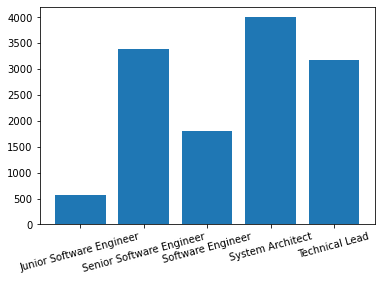

In [77]:
plt.bar(avg_salary['Зарплата.в.месяц']['mean'].index, avg_salary['Зарплата.в.месяц']['mean'])
plt.xticks(rotation=15)
plt.show()